In [2]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


You should consider upgrading via the 'c:\users\matowy\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [366]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline
#%%
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

In [367]:
import math

def mw_to_dbm(x):
    # https://www.rapidtables.com/convert/power/mW_to_dBm.html
    return 10* math.log10(x/1)

def dbm_to_mw(x):
    return 1*math.pow(10, (x/10))

# 1.258925
dbm_to_mw(1)

1.2589254117941673

In [429]:
# stale
c = 299_792_458 # [m/s] - predkosc rozchodzenia sie swiatla w prozni
h = 6.620*1e-34 # [Js] - stala planca

# wartosci zalozone
n0 = 1000 # [fotonów/bit] - wartosc pesymistyczna, liczba fotonow potrzebna do odczytania 1 w odbiorniku
lam = 1550e-9 # nm - dlugosc fali
# Ps = mw_to_dbm(20) # [dBm] - moc nadajnika
L_smf = 167 # km - dlugosc trasy https://www.google.com/maps/dir/33-100+Tarn%C3%B3w/Przemy%C5%9Bl/@49.9802015,20.765582,8z/am=t/data=!3m1!4b1!4m14!4m13!1m5!1m1!1s0x473d834352c3ffc7:0xcf1a70dff872f61e!2m2!1d20.9858407!2d50.0121011!1m5!1m1!1s0x473b7edf1fb668d1:0x1efc1701bb993ff0!2m2!1d22.7677908!2d49.7838623!3e1

# tresc zadania
Pm = 1 # dB - margines mocy odbieranej w odbiorniku
As = 0.2 # dB - straty na spawie
Ac = 1 # db - straty na złączu
LX = 20 # km - spaw co tyle km
sprawnosc_fotodiody = 0.5 # %

# z dokumentacji
# smf-28 ultra
alfa_smf = tlumiennosc_swiatlowodu_smf_28 = 0.18 # <= dB / km - maksimum
n_smf = wspolczynnik_zalamania_smf_28 = 1.4682
D_smf = dyspersja_smf_28 = 18.0 # <= [ps/nm*km] 


### opis wartosci:
dyspersja 18 to jest duzo, w przypadku lacza jednokanalowego too raczej zly wybor, to bylby lepszy wybor do lacza wielokanalowego, poniewaz tam najwiekszym problemem jest mieszanie czterofalowe, gdzie w celu ograniczenia jego efektu im wiekszy wspolczynnik dyspersji tym lepiej.

#### straty na zlaczach
- spawy (As)- zazwyczaj ok. 0.05, u mnie jest duzo wyzsza niz standardowa (0.2)
- zlaczki (Ac)- zazwwyczaj 0.05, 0.1 dopuszczalna, 1 zdecydowanie za duzo
zlaczki znajduja sie na poczatku lacza, tam gdzie swiatlowod trafia do modulu kompensujacego, po wyjsciu z modulu k do fotodetektora jest kolejjna
ilosc zlaczek. W dokumentacjji nie znalazlem info o braniu pod uwage zlaczek wiec zalozylem ich istnienie zgodnie z zadaniem
tak samo w przypadku swiatlowodu kompensujacego
- odleglosc miedzy spawami- 5 to malo, 20 sa ok
- margines 3-6 db standardowo, 1 to jakos malo, 6 bardzoo duzo



## Kompensacja
a)używając jednego lub kilku modułów kompensujących dyspersję 
On jest od razu wyliczony
Kazdy z modulow wnosi tlumienie; trzeba wziac pod uwage ten budzet mocy; wartosc powinna byc jak najblizsza 0
b) używając światłowodu DCF-38
jego uzywamy tyle ile trzeba- wyliczyc


In [430]:
# z dokumentacji
# smf-28 ultra
alfa_smf = tlumiennosc_swiatlowodu_smf_28 = 0.18 # <= dB / km - maksimum
wspolczynnik_zalamania_smf_28 = 1.4682
D_smf = dyspersja_smf_28 = 18.0 # <= [ps/nm*km]

# b
# smf-38
alfa_dcf = tlumiennosc_swiatlowodu_dcf_38 = 0.265 # <= dB / km - maksimum
n_dcf = wspolczynnik_zalamania_dcf_38 = 1.474
D_dcf = dyspersja_smf_38 = -38 # <= [ps/nm*km]
# dyspersja_smf_38 = -30 # wartosci to: -49.00 to -30.00 ps/(nm*km)

In [431]:
# # obliczenia
liczba_spawow = L_smf // LX # liczba bez jednostki
print(f'{liczba_spawow=}')
# v = c/n, n=wspolczynnik zalamania, v=predkosc fali
v = c / n_smf # m/s
print(f'{v=}')

# f= v/lambda, labda = dlugoosc fali, f= czestotliwosc fali
f = v / lam # m/s / m = Hz
# f = c / lam # m/s / m = Hz
print(f'{f=:.3}')
# Pc = straty_na_spawach + straty_na_zlaczach
# print(f'{Pc=}')

liczba_spawow=8
v=204190476.77428144
f=1.32e+14


# B) Kompensacja uzywajac swiatlowodu dcf-38

In [432]:
straty_na_spawach = liczba_spawow * As # dB
print(f'{straty_na_spawach=}')
straty_na_zlaczach = 3 * Ac
print(f'{straty_na_zlaczach=}')

Pc = straty_na_polaczeniach = straty_na_spawach + straty_na_zlaczach
print(f'{Pc=}')

straty_na_spawach=1.6
straty_na_zlaczach=3
Pc=4.6


In [433]:
L_dcf = - L_smf * D_smf / D_dcf
print(f'{L_dcf=:.2f}')
x_dcf = L_dcf*alfa_dcf
x_smf = L_smf*alfa_smf
print(f'{alfa_dcf}dB/km * {L_dcf:.2f}km = {x_dcf:.2F}dB')
print(f'{alfa_smf}dB/km * {L_smf}km = {x_smf:.2F} dB')
X = x_dcf + x_smf
print(f'{x_dcf:.2f}dB + {x_smf}dB = {X:.2f}dB')

L_dcf=79.11
0.265dB/km * 79.11km = 20.96dB
0.18dB/km * 167km = 30.06 dB
20.96dB + 30.06dB = 51.02dB



B0=5 Gb/s
Pr0 = -33.60 db = 4.36e-07 W
Pr = 8.72e-07 W = -30.59 dB
Ps = Pr + Pm + Pc + X = -30.59dB + 1dB + 4.6dB + 51.02dB = 26.03dB = 400.73 mW

B0=20 Gb/s
Pr0 = -27.58 db = 1.74e-06 W
Pr = 3.49e-06 W = -24.57 dB
Ps = Pr + Pm + Pc + X = -24.57dB + 1dB + 4.6dB + 51.02dB = 32.05dB = 1602.92 mW

B0=50 Gb/s
Pr0 = -23.60 db = 4.36e-06 W
Pr = 8.72e-06 W = -20.59 dB
Ps = Pr + Pm + Pc + X = -20.59dB + 1dB + 4.6dB + 51.02dB = 36.03dB = 4007.29 mW


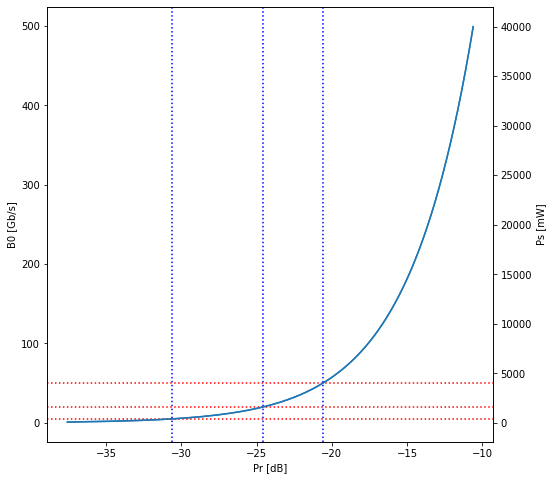

In [434]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_pr0_dbm(B0):
    return 10*math.log10(n0 * h * f * B0*1e9 / 0.001)

def plot_pr(b0_range, x_compensator, Pc, print_results=False, plot=False):
    results = []
    for B0 in b0_range:
        if print_results:
            print(f'\n{B0=} Gb/s')
        Pr0_dbm = calculate_pr0_dbm(B0)
        Pr0_mw = dbm_to_mw(Pr0_dbm)
        # print(f'Pr0 = {Pr0_dbm:.2f} [db] = {Pr0_mw:.2e} [mW] = {Pr0_mw/1000:.2e} [W]')
        if print_results:
            print(f'Pr0 = {Pr0_dbm:.2f} db = {Pr0_mw/1000:.2e} W')

        Pr_mw = dbm_to_mw(Pr0_dbm) / sprawnosc_fotodiody
        Pr_db = mw_to_dbm(Pr_mw)
        
        Ps_db = Pr_db + Pm + Pc + X
        Ps_mw = dbm_to_mw(Ps_db)
        # print(f'Pr = {Pr_mw:.2e} [mw], {Pr_mw/1000:.2e} [W], {Pr_db=:.2f} [dB]')
        if print_results:
            print(f'Pr = {Pr_mw/1000:.2e} W = {Pr_db:.2f} dB')
            print(f'Ps = Pr + Pm + Pc + X = {Pr_db:.2F}dB + {Pm}dB + {Pc}dB + {X:.2f}dB = {Ps_db:.2f}dB = {Ps_mw:.2f} mW')
        results.append([B0, Pr_db, Pm, Pc, x_compensator, x_smf, Ps_db, Ps_mw])
    df = pd.DataFrame(results, columns=['B0', 'Pr_db', 'Pm', 'Pc', 'x_compensator', 'x_smf', 'Ps_db','Ps_mw'])
    if plot:
        fig, ax = plt.subplots(figsize=[8,8])
        fig = sns.lineplot(data=df, x='Pr_db', y='B0')
        plt.ylabel('B0 [Gb/s]')
        plt.xlabel('Pr [dB]')
        for val in [5, 20, 50]:
            Pr_db_val = Pr.loc[Pr.B0 == val, 'Pr_db'].values[0]
            plt.axhline(y=val, color='r', linestyle=':')
            plt.axvline(x=Pr_db_val, color='b', linestyle=':')
            

#         fig, ax = plt.subplots(figsize=[6,6])
        ax2 = plt.twinx()
        fig = sns.lineplot(data=df, x='Pr_db', y='Ps_mw', ax=ax2)
        plt.xlabel('Pr [dB]')
        plt.ylabel('Ps [mW]')
    return df

results = plot_pr([5, 20, 50], x_dcf, Pc, True)
_ = plot_pr(range(1,500), x_dcf, Pc, plot=True)

In [435]:
def print_results_tables(results):
    df = results[['B0','Pr_db', 'Ps_mw','Pm', 'Pc', 'x_compensator', 'x_smf']]
    df = df.set_index('B0', drop=True)

    pd.options.display.float_format = '{:,.2f}'.format
    display(df[['Pr_db', 'Ps_mw']])
    columns = 'Pr_db','Pm', 'Pc', 'x_compensator', 'x_smf'
    display(df[[*columns]])
    pd.options.display.float_format = '~{:,.0f}%'.format
    display(df[[*columns]].abs().apply(lambda x: x/x.sum()*100, axis=1))
print_results_tables(results)

,Pr_db,Ps_mw
B0,,
5,-30.59,400.73
20,-24.57,"1,602.92"
50,-20.59,"4,007.29"


,Pr_db,Pm,Pc,x_compensator,x_smf
B0,,,,,
5,-30.59,1,4.60,20.96,30.06
20,-24.57,1,4.60,20.96,30.06
50,-20.59,1,4.60,20.96,30.06


,Pr_db,Pm,Pc,x_compensator,x_smf
B0,,,,,
5,~35%,~1%,~5%,~24%,~34%
20,~30%,~1%,~6%,~26%,~37%
50,~27%,~1%,~6%,~27%,~39%


# A) Kompensacja uzywajac modulow kompensujacych

In [436]:
# kompensacje
# a
# modul kompensujacy aris dcm
L_smf
D = D_smf * L_smf
D

167

3006.0

In [437]:

DCM‐20A/* -340 ± 2% 20 km 2.7 0.4
DCM‐30A/* -510 ± 2% 30 km 3.1 0.5
DCM‐40A/* -680 ± 2% 40 km 3.6 0.6
DCM‐50A/* -850 ± 2% 50 km 4.0 0.7
DCM‐60A/* -1020 ± 2% 60 km 4.7 0.7
DCM‐70A/* -1190 ± 2% 70 km 5.1 0.8
DCM‐80A/* -1360 ± 2% 80 km 5.6 0.8
DCM‐90A/* -1530 ± 2% 90 km 6.0 0.9
DCM‐100A/* -1700 ± 2% 100 km 6.5 0.9

SyntaxError: invalid character in identifier (<ipython-input-437-b6bec789883b>, line 1)

In [441]:
pd.options.display.float_format = '{:,.2f}'.format
copensation_modules = pd.read_clipboard(header=None)
copensation_modules = copensation_modules.iloc[:, [0,1, 4, 6]]
copensation_modules.columns = ['type', 'dispersion', 'fiber_compensation_distance', 'insertion_loss']
copensation_modules['needs_due_to_dispersion_comp'] = copensation_modules.dispersion.apply(lambda dispersion_compensation: -int(D // dispersion_compensation))
copensation_modules['full_insertion_loss'] = copensation_modules.insertion_loss * copensation_modules.needs_due_to_dispersion_comp
copensation_modules

,type,dispersion,fiber_compensation_distance,insertion_loss,needs_due_to_dispersion_comp,full_insertion_loss
0,DCM‐20A/*,-340,20,2.70,9,24.30
1,DCM‐30A/*,-510,30,3.10,6,18.60
2,DCM‐40A/*,-680,40,3.60,5,18.00
3,DCM‐50A/*,-850,50,4.00,4,16.00
4,DCM‐60A/*,-1020,60,4.70,3,14.10
5,DCM‐70A/*,-1190,70,5.10,3,15.30
6,DCM‐80A/*,-1360,80,5.60,3,16.80
7,DCM‐90A/*,-1530,90,6.00,2,12.00
8,DCM‐100A/*,-1700,100,6.50,2,13.00


In [442]:
straty_na_spawach = liczba_spawow * As # dB
print(f'{straty_na_spawach=}')
straty_na_zlaczach = 3 * Ac
print(f'{straty_na_zlaczach=}')

Pc = straty_na_polaczeniach = straty_na_spawach + straty_na_zlaczach
print(f'{Pc=}')

straty_na_spawach=1.6
straty_na_zlaczach=3
Pc=4.6


In [443]:
x_dcm = 12
print(f'{x_dcm=}')
x_smf = L_smf*alfa_smf
print(f'{alfa_smf}db/km * {L_smf}km = {x_smf:.2F} db')
X = x_smf + x_dcm
print(f'{X=:.2f}')

x_dcm=12
0.18db/km * 167km = 30.06 db
X=42.06



B0=5 Gb/s
Pr0 = -33.60 db = 4.36e-07 W
Pr = 8.72e-07 W = -30.59 dB
Ps = Pr + Pm + Pc + X = -30.59dB + 1dB + 4.6dB + 42.06dB = 17.07dB = 50.88 mW

B0=20 Gb/s
Pr0 = -27.58 db = 1.74e-06 W
Pr = 3.49e-06 W = -24.57 dB
Ps = Pr + Pm + Pc + X = -24.57dB + 1dB + 4.6dB + 42.06dB = 23.09dB = 203.53 mW

B0=50 Gb/s
Pr0 = -23.60 db = 4.36e-06 W
Pr = 8.72e-06 W = -20.59 dB
Ps = Pr + Pm + Pc + X = -20.59dB + 1dB + 4.6dB + 42.06dB = 27.07dB = 508.82 mW


,Pr_db,Ps_mw
B0,,
5,-30.59,50.88
20,-24.57,203.53
50,-20.59,508.82


,Pr_db,Pm,Pc,x_compensator,x_smf
B0,,,,,
5,-30.59,1,4.60,12,30.06
20,-24.57,1,4.60,12,30.06
50,-20.59,1,4.60,12,30.06


,Pr_db,Pm,Pc,x_compensator,x_smf
B0,,,,,
5,~39%,~1%,~6%,~15%,~38%
20,~34%,~1%,~6%,~17%,~42%
50,~30%,~1%,~7%,~18%,~44%


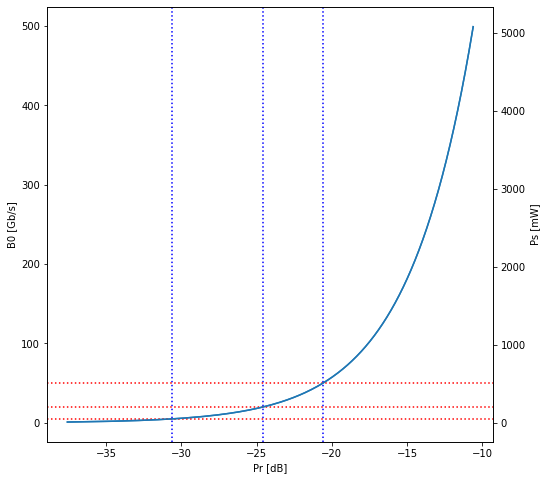

In [444]:
results = plot_pr([5, 20, 50], x_dcm, Pc, True)
_ = plot_pr(range(1,500), x_dcm, Pc, plot=True)
print_results_tables(results)